### CUNY Data 620 - Web Analytics, Summer 2020
**Group Homework Assignment 4**  
**Prof**: Alain Ledon  
**Members**: Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout

### Instructions  

Here is a dataset that shows a simple 2-mode network - the attendance of 18 Southern Women at 14 social events:

1) [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms. 

2) [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat).  

3) Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html  


What can you infer about the relationships between (1) the women, and (2) the social events?  

### Import Packages

In [34]:
import networkx as nx
from networkx.algorithms import bipartite as bi
import numpy as np
import matplotlib.pyplot as plt
import os
import string

### Import Data

We utilized the NetworkX documentation [here](https://networkx.github.io/documentation/networkx-1.9.1/examples/algorithms/davis_club.html) in order to properly load the .dat file and create a bipartite graph. Our functions for doing this are below with comments on each step:

In [ ]:
g=nx.generators.empty_graph()

In [24]:
# this function creates an emtpy graph, and then 
# utilizing the contents of the .dat file to set up our graph
# for analysis

def davis_club_graph(create_using=None, **kwds):
    nwomen=18
    nclubs=14
    g=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    g.clear()
    g.name="Davis Southern Club Women"
    
    # loading the women's names
    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    # loading the club names
    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    # loading the interaction matrix
    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # creating a list of women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # creating a list of club names
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parsing our interactions matrix, adding edges
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                g.add_edge(w[row],c[col])
        row+=1
    return (g,list(w.values()),list(c.values()))

In [27]:
# since this is a two-mode network, we need to project the bipartite
# graph as a unipartite graph

def project(b, pv, result=False,**kwds):
    if result:
        g=result
    else:
        g=nx.Graph(**kwds)
    for v in pv:
        g.add_node(v)
        for cv in b.neighbors(v):
            g.add_edges_from([(v,u) for u in b.neighbors(cv)])
    return g

In [71]:
# return graph and women and clubs lists
(g,women,clubs)=davis_club_graph()

In [72]:
g.edges

EdgeView([('EVELYN', 'E1'), ('EVELYN', 'E2'), ('EVELYN', 'E3'), ('EVELYN', 'E4'), ('EVELYN', 'E5'), ('EVELYN', 'E6'), ('EVELYN', 'E8'), ('EVELYN', 'E9'), ('E1', 'LAURA'), ('E1', 'BRENDA'), ('E2', 'LAURA'), ('E2', 'THERESA'), ('E3', 'LAURA'), ('E3', 'THERESA'), ('E3', 'BRENDA'), ('E3', 'CHARLOTTE'), ('E3', 'FRANCES'), ('E4', 'THERESA'), ('E4', 'BRENDA'), ('E4', 'CHARLOTTE'), ('E5', 'LAURA'), ('E5', 'THERESA'), ('E5', 'BRENDA'), ('E5', 'CHARLOTTE'), ('E5', 'FRANCES'), ('E5', 'ELEANOR'), ('E5', 'RUTH'), ('E6', 'LAURA'), ('E6', 'THERESA'), ('E6', 'BRENDA'), ('E6', 'FRANCES'), ('E6', 'ELEANOR'), ('E6', 'PEARL'), ('E6', 'NORA'), ('E8', 'LAURA'), ('E8', 'THERESA'), ('E8', 'BRENDA'), ('E8', 'FRANCES'), ('E8', 'ELEANOR'), ('E8', 'PEARL'), ('E8', 'RUTH'), ('E8', 'VERNE'), ('E8', 'MYRNA'), ('E8', 'KATHERINE'), ('E8', 'SYLVIA'), ('E8', 'HELEN'), ('E8', 'DOROTHY'), ('E9', 'THERESA'), ('E9', 'PEARL'), ('E9', 'RUTH'), ('E9', 'VERNE'), ('E9', 'MYRNA'), ('E9', 'KATHERINE'), ('E9', 'SYLVIA'), ('E9', 'NO

In [73]:
g.nodes

NodeView(('EVELYN', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9', 'LAURA', 'E7', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'E12', 'MYRNA', 'E10', 'KATHERINE', 'E13', 'E14', 'SYLVIA', 'NORA', 'E11', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA'))

##### Affiliation network of clubs

With our bipartite graph saved as a graph object, we can start to run some analyses. First, we can put together an affiliation network of the clubs:

In [76]:
c = bi.weighted_projected_graph(g, clubs, ratio=False)

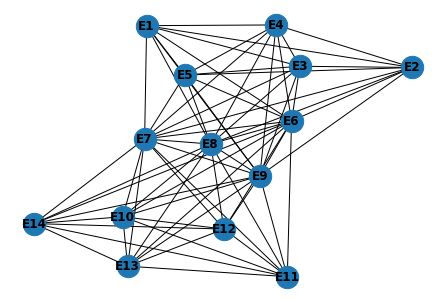

In [83]:
nx.draw_spring(c, with_labels = True, font_weight='bold', node_size=500)

##### Affiliation network of women

And we can also put together an affiliation network of the women:

In [92]:
w = bi.weighted_projected_graph(g, women, ratio=False)

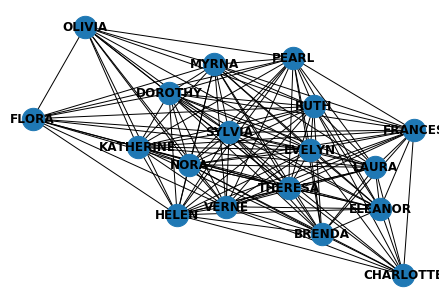

In [93]:
nx.draw_spring(w, with_labels = True, font_weight='bold', node_size=500)

In [91]:
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

b = nx.betweenness_centrality(w)
bs = sorted_map(b)
bs

SyntaxError: invalid syntax (<ipython-input-91-577370c9b7e5>, line 2)